In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [5]:
def within_class_scatter_matrix(class_1, class_2, center_1, center_2):
    within_class_1 = class_1.T - center_1
    within_class_2 = class_2.T - center_2    
    S_w_1 = np.dot(within_class_1, within_class_1.T)
    S_w_2 = np.dot(within_class_2, within_class_2.T)
    S_w = S_w_1 + S_w_2
    return S_w

In [6]:
#points = pd.read_csv('../data/西瓜数据集3.0')
points = pd.read_csv('../data/testdata')
data = np.array(points.ix[:,:2])
labels = np.array(points.ix[:,2])
class_1 = data[labels == 0]
class_2 = data[labels ==1]
centers = points.groupby('class').apply(np.mean).ix[:,:2].as_matrix()
center_1 = centers[0]
center_2 = centers[1]
center_1.shape = (2,1)
center_2.shape = (2,1)
S_w = within_class_scatter_matrix(class_1, class_2, center_1, center_2)
u,s,v = np.linalg.svd(S_w)    
s = np.mat(np.diag(s))
u = np.mat(u)
v = np.mat(v)
S_w_reverse = np.dot(np.dot(v.T,s.I),u.T)
w = np.dot(S_w_reverse,(center_1-center_2))


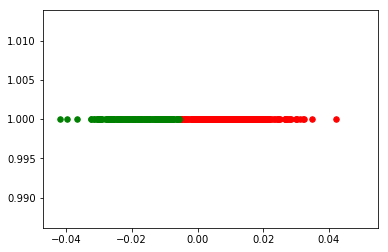

In [7]:
y_1 = []
y_2 = []
y_1_matrix = np.dot(class_1,w)
y_2_matrix = np.dot(class_2,w)
map(lambda t:y_1.append(t[0,0]), y_1_matrix)
map(lambda t:y_2.append(t[0,0]), y_2_matrix)
plt.figure()
plt.scatter(y_1,np.ones(len(y_1)),s=30,c='red')
plt.scatter(y_2,np.ones(len(y_2)),s=30,c='green')